In [2]:
# Import Libraries : 

# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, )

# Scikit-Learn ≥1.0 is required
import sklearn
assert sklearn.__version__ >= "1.0"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Precision options
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.3f}'.format

In [3]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix
from testPipeline import *

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn import metrics

In [5]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor


In [6]:
filepath = os.path.abspath(os.path.join('..', 'data', 'loans_data.csv'))
print('File path: {}'.format(filepath))

loadData = pd.read_csv(filepath)

File path: c:\Users\sanji\Documents\Queens\End_to_End_Supervised_Learning\data\loans_data.csv


In [7]:
loadData.sample(10)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
1212,83857.000,35000,35000,18.49%,36 months,debt_consolidation,16.33%,NY,RENT,11000.000,705-709,15,13766,1.000,NaN
2207,42772.000,15000,15000,7.90%,36 months,debt_consolidation,20.75%,IL,MORTGAGE,2583.330,725-729,10,9608,0.000,3 years
1673,51429.000,8000,8000,16.29%,36 months,debt_consolidation,9.75%,TX,RENT,5250.000,665-669,14,6035,1.000,5 years
1495,16549.000,25000,15175,16.32%,60 months,debt_consolidation,22.19%,PA,MORTGAGE,7083.330,705-709,8,9133,0.000,4 years
208,80538.000,12300,12300,12.12%,36 months,debt_consolidation,10.01%,CA,RENT,6583.330,690-694,15,12450,0.000,1 year
451,59890.000,25000,25000,21.00%,36 months,debt_consolidation,9.52%,NY,RENT,8333.330,670-674,11,8575,1.000,10+ years
193,5282.000,7000,6965.1,19.47%,36 months,debt_consolidation,17.08%,NJ,RENT,5000.000,665-669,11,13859,0.000,3 years
799,51087.000,10000,10000,9.76%,36 months,debt_consolidation,14.08%,LA,MORTGAGE,5416.670,710-714,8,10560,0.000,3 years
678,51829.000,8000,8000,7.90%,36 months,wedding,21.58%,CA,RENT,5166.670,725-729,5,0,0.000,1 year
2458,8692.000,16000,15875,13.85%,36 months,debt_consolidation,12.50%,IL,RENT,6750.000,685-689,12,6799,2.000,7 years


In [8]:
loadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2499 non-null   object 
 2   Amount.Funded.By.Investors      2499 non-null   object 
 3   Interest.Rate                   2500 non-null   object 
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2497 non-null   float64
 10  FICO.Range                      2500 non-null   object 
 11  Open.CREDIT.Lines               2496 non-null   object 
 12  Revolving.CREDIT.Balance        24

In [9]:
"""
Creating a training and test dataset : 

"""

from sklearn.model_selection import train_test_split

In [10]:
ld_train, ld_test = train_test_split(loadData, test_size= 0.2, random_state= 42)

In [11]:
# drop columns : Amount.Funded.By.Investors , ID, Interest.Rate

#1 Amount requested : convert it to numeric

#2 Loan Length : create dummies with frequency cutoff 20

#3 Loan.Purpose : dummies with freq cutoff

#4  Debt.To.Income.Ratio : remove % and then convert to numeric

#5  State: dummies with frequency cutoff

#6 Home.Ownership : dummies with frequency cutoff

#7 Monthly Income : as is

#8 FICO.Range : break a-b , in to a ,b , convert them to numeric 
# then create new column fico=0.5*(a+b) and then drop the original FICO.Range

#9 Open Credit Lines : convert to numeric

#10 Revolving Credit balance : convert it to numeric 

#11 inquiries in the last 6 months : as is

#12 Employment.Length : create dummies with frequency cutoff

In [12]:
p1=pdPipeline([
    ('var_select',VarSelector(['Amount.Requested','Open.CREDIT.Lines','Revolving.CREDIT.Balance'])),
    ('convert_to_numeric',convert_to_numeric()),
    ('missing_trt',DataFrameImputer())
])

p2=pdPipeline([
    ('var_select',VarSelector(['Debt.To.Income.Ratio'])),
    ('string_clean',string_clean(replace_it='%',replace_with='')),
    ('convert_to_numeric',convert_to_numeric()),
    ('missing_trt',DataFrameImputer())
])

p3=pdPipeline([
    ('var_select',VarSelector(['Loan.Length', 'Loan.Purpose','State','Home.Ownership','Employment.Length'])),
    ('missing_trt',DataFrameImputer()),
    ('create_dummies',get_dummies_Pipe(20))
])

p4=pdPipeline([
    ('var_select',VarSelector(['Monthly.Income','Inquiries.in.the.Last.6.Months'])),
    ('missing_trt',DataFrameImputer())
])

p5=pdPipeline([
    ('var_select',VarSelector(['FICO.Range'])),
    ('custom_fico',custom_fico()),
    ('missing_trt',DataFrameImputer())
])

data_pipe=FeatureUnion([
    ('obj_to_num',p1),
    ('dtir',p2),
    ('obj_to_dum',p3),
    ('num',p4),
    ('fico',p5)
])

In [81]:
x_train=pd.DataFrame(data=data_pipe.fit_transform(ld_train),
                     columns=data_pipe.get_feature_names())

c:\Users\sanji\Documents\Queens\End_to_End_Supervised_Learning\src\testPipeline.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=pd.to_numeric(X[col],errors='coerce')
c:\Users\sanji\Documents\Queens\End_to_End_Supervised_Learning\src\testPipeline.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=X[col].str.replace(self.replace_it,self.replace_with)
c:\Users\sanji\Documents\Queens\End_to_End_Supervised_Learning\src\testPipeline.py:91: SettingWithCopyWarning: 
A value is trying to be set 

ValueError: Shape of passed values is (2000, 58), indices imply (2000, 160)

In [14]:
x_train.columns

Index(['obj_to_num__Amount.Requested', 'obj_to_num__Open.CREDIT.Lines',
       'obj_to_num__Revolving.CREDIT.Balance', 'dtir__Debt.To.Income.Ratio',
       'obj_to_dum__Loan.Length_36 months',
       'obj_to_dum__Loan.Length_60 months',
       'obj_to_dum__Loan.Purpose_debt_consolidation',
       'obj_to_dum__Loan.Purpose_credit_card',
       'obj_to_dum__Loan.Purpose_other',
       'obj_to_dum__Loan.Purpose_home_improvement',
       'obj_to_dum__Loan.Purpose_major_purchase',
       'obj_to_dum__Loan.Purpose_small_business',
       'obj_to_dum__Loan.Purpose_car', 'obj_to_dum__Loan.Purpose_wedding',
       'obj_to_dum__Loan.Purpose_medical', 'obj_to_dum__Loan.Purpose_moving',
       'obj_to_dum__State_CA', 'obj_to_dum__State_NY', 'obj_to_dum__State_TX',
       'obj_to_dum__State_FL', 'obj_to_dum__State_IL', 'obj_to_dum__State_GA',
       'obj_to_dum__State_PA', 'obj_to_dum__State_NJ', 'obj_to_dum__State_VA',
       'obj_to_dum__State_MA', 'obj_to_dum__State_OH', 'obj_to_dum__State_MD',


In [15]:
y_train=ld_train['Interest.Rate'].str.replace('%','').astype(float)

In [16]:
x_test=pd.DataFrame(data=data_pipe.transform(ld_test),
                     columns=data_pipe.get_feature_names())

c:\Users\sanji\Documents\Queens\End_to_End_Supervised_Learning\src\testPipeline.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=pd.to_numeric(X[col],errors='coerce')
c:\Users\sanji\Documents\Queens\End_to_End_Supervised_Learning\src\testPipeline.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=X[col].str.replace(self.replace_it,self.replace_with)
c:\Users\sanji\Documents\Queens\End_to_End_Supervised_Learning\src\testPipeline.py:91: SettingWithCopyWarning: 
A value is trying to be set 

In [17]:
y_test=ld_test['Interest.Rate'].str.replace('%','').astype(float)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [79]:
### Check the missing values :
incomplete_row = x_train[x_train.isna().any(axis=1)]
incomplete_row

,obj_to_num__Amount.Requested,obj_to_num__Open.CREDIT.Lines,obj_to_num__Revolving.CREDIT.Balance,dtir__Debt.To.Income.Ratio,obj_to_dum__Loan.Length_36 months,obj_to_dum__Loan.Length_60 months,obj_to_dum__Loan.Purpose_debt_consolidation,obj_to_dum__Loan.Purpose_credit_card,obj_to_dum__Loan.Purpose_other,obj_to_dum__Loan.Purpose_home_improvement,...,obj_to_dum__Employment.Length_4 years,obj_to_dum__Employment.Length_1 year,obj_to_dum__Employment.Length_6 years,obj_to_dum__Employment.Length_7 years,obj_to_dum__Employment.Length_8 years,obj_to_dum__Employment.Length_missing,obj_to_dum__Employment.Length_9 years,num__Monthly.Income,num__Inquiries.in.the.Last.6.Months,fico__fico


In [19]:
lm=LinearRegression()

In [20]:
cv_mae=-cross_val_score(lm,
                        x_train,y_train,
                        cv=10,
                        scoring='neg_mean_absolute_error')

In [21]:
cv_mae , cv_mae.mean() , cv_mae.std()

(array([1.6 , 1.6 , 1.82, 1.68, 1.5 , 1.56, 1.6 , 1.46, 1.54, 1.55]),
 1.5901980128614053,
 0.09612263133223106)

In [22]:
"""
Fit x_train , y_train
"""
lm.fit(x_train,y_train)

LinearRegression()

In [23]:
lm.intercept_

74.37214668381299

In [24]:
lm.coef_

array([ 1.64e-04, -4.52e-02, -1.10e-06, -4.78e-04,  6.45e-02,  3.19e+00,
       -4.67e-01, -6.26e-01,  3.36e-01, -5.96e-01, -1.02e-01,  1.61e-01,
       -3.08e-01, -7.44e-01, -6.16e-01,  7.50e-01, -1.95e-01, -1.90e-01,
        4.33e-01, -8.54e-02, -5.81e-01, -1.47e-01, -7.53e-01, -5.37e-01,
       -3.28e-01, -1.89e-01,  4.35e-02, -1.55e-01, -2.66e-01, -2.82e-01,
        2.81e-01, -1.18e-01, -8.42e-02,  3.13e-01,  9.53e-03, -4.21e-01,
        1.62e-01,  2.62e-02,  9.50e-02, -4.69e-03, -1.44e+00, -1.69e+00,
       -1.41e+00, -4.62e-01, -5.76e-01, -5.99e-01, -7.10e-01, -3.46e-01,
       -4.68e-01, -7.51e-01, -3.78e-01, -6.98e-01, -6.93e-01, -3.08e-01,
       -8.72e-01, -2.78e-05,  3.49e-01, -8.64e-02])

In [25]:
list(zip(x_train.columns,lm.coef_))

[('obj_to_num__Amount.Requested', 0.00016365046976475064),
 ('obj_to_num__Open.CREDIT.Lines', -0.04521276749143588),
 ('obj_to_num__Revolving.CREDIT.Balance', -1.1035246329996608e-06),
 ('dtir__Debt.To.Income.Ratio', -0.000478164026940453),
 ('obj_to_dum__Loan.Length_36 months', 0.06450763433705647),
 ('obj_to_dum__Loan.Length_60 months', 3.1908741453889595),
 ('obj_to_dum__Loan.Purpose_debt_consolidation', -0.46680349114086117),
 ('obj_to_dum__Loan.Purpose_credit_card', -0.625544553025689),
 ('obj_to_dum__Loan.Purpose_other', 0.33610617463430303),
 ('obj_to_dum__Loan.Purpose_home_improvement', -0.5959949962728803),
 ('obj_to_dum__Loan.Purpose_major_purchase', -0.10226478671327802),
 ('obj_to_dum__Loan.Purpose_small_business', 0.16066676767492638),
 ('obj_to_dum__Loan.Purpose_car', -0.3078622502548871),
 ('obj_to_dum__Loan.Purpose_wedding', -0.744282490355365),
 ('obj_to_dum__Loan.Purpose_medical', -0.6163970650920092),
 ('obj_to_dum__Loan.Purpose_moving', 0.7503989498826253),
 ('obj_t

In [26]:
"""
Now  -  lets Predict using x_test
"""

'\nNow  -  lets Predict using x_test\n'

In [27]:
ypred=lm.predict(x_test)

In [28]:
mse = mean_squared_error(y_test, ypred)

In [29]:
print("MSE: ", mse)

MSE:  4.533647813793135


In [30]:
print("RMSE: ", mse**(0.5)) 



RMSE:  2.1292364391474083


In [31]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error: 1.6300811210674946
Mean Squared Error: 4.533647813793135
Root Mean Squared Error: 2.1292364391474083


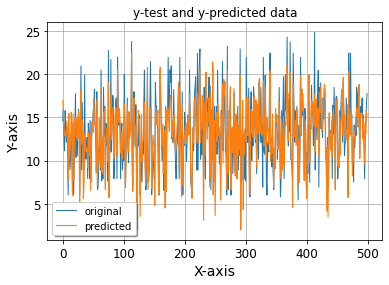

In [32]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

# Ridge  Regression

In [33]:
lambdas=np.linspace(1,100,100)

In [34]:
params={'alpha':lambdas}

In [35]:
model=Ridge(fit_intercept=True)

In [36]:
grid_search=GridSearchCV(model,
                         param_grid=params,
                         cv=10,
                         scoring='neg_mean_absolute_error',
                        verbose=20,n_jobs=-1)

In [37]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error', verbose=20)

In [38]:
grid_search.best_estimator_

Ridge(alpha=46.0)

In [39]:
grid_search.cv_results_

{'mean_fit_time': array([0.31, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.02, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01,
        0.02, 0.02, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.02, 0.01,
        0.02, 0.03, 0.02, 0.02, 0.01, 0.01, 0.02, 0.02, 0.03, 0.02, 0.01,
        0.03, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02,
        0.03, 0.01, 0.02, 0.03, 0.02, 0.02, 0.01, 0.02, 0.02, 0.01, 0.01,
        0.02, 0.02, 0.02, 0.02, 0.03, 0.01, 0.02, 0.01, 0.02, 0.01, 0.01,
        0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01,
        0.01]),
 'std_fit_time': array([0.21, 0.01, 0.01, 0.01, 0.01, 0.  , 0.03, 0.02, 0.02, 0.01, 0.03,
        0.02, 0.03, 0.  , 0.02, 0.03, 0.01, 0.02, 0.03, 0.01, 0.01, 0.02,
        0.02, 0.02, 0.  , 0.02, 0.02, 0.02, 0.02, 0.01, 0.  , 0.02, 0.  ,
        0.02, 0.03, 0.02, 0.02, 0.  , 0.01, 0.01, 0.04, 0.03, 0

 if you want you can now fit a ridge regression model with obtained value of alpha , although there is no need, grid search automatically fits the best estimator on the entire data, you can directly use this to make predictions on test_data. But if you want to look at coefficients ,
  its much more convenient to fit the model with direct function

Using the report function given below you can see the cv performance of top few models as well, that will the tentative performance

In [40]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [41]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -1.576306 (std: 0.091083)
Parameters: {'alpha': 46.0}

Model with rank: 2
Mean validation score: -1.576306 (std: 0.091074)
Parameters: {'alpha': 47.0}

Model with rank: 3
Mean validation score: -1.576307 (std: 0.091091)
Parameters: {'alpha': 45.0}

Model with rank: 4
Mean validation score: -1.576308 (std: 0.091065)
Parameters: {'alpha': 48.0}

Model with rank: 5
Mean validation score: -1.576315 (std: 0.091054)
Parameters: {'alpha': 49.0}



In [42]:
grid_search.best_estimator_

Ridge(alpha=46.0)

In [43]:
ridge_model=grid_search.best_estimator_

In [44]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=46.0)

In [45]:
print( "Fitting Score for Ridge", ridge_model.score(x_train,y_train))

Fitting Score for Ridge 0.7682404791797869


In [46]:
list(zip(data_pipe.get_feature_names(),ridge_model.coef_))

c:\ProgramData\Anaconda_3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('obj_to_num__Amount.Requested', 0.0001668564181247607),
 ('obj_to_num__Open.CREDIT.Lines', -0.04559435255594117),
 ('obj_to_num__Revolving.CREDIT.Balance', -1.3382442706790615e-06),
 ('dtir__Debt.To.Income.Ratio', -0.0008823507117937254),
 ('obj_to_dum__Loan.Length_36 months', -1.4343418345009418),
 ('obj_to_dum__Loan.Length_60 months', 1.4666953385271964),
 ('obj_to_dum__Loan.Purpose_debt_consolidation', -0.23675715267267214),
 ('obj_to_dum__Loan.Purpose_credit_card', -0.37923655720184146),
 ('obj_to_dum__Loan.Purpose_other', 0.4233904834134444),
 ('obj_to_dum__Loan.Purpose_home_improvement', -0.272307572061432),
 ('obj_to_dum__Loan.Purpose_major_purchase', 0.05062242422752886),
 ('obj_to_dum__Loan.Purpose_small_business', 0.2261899413589224),
 ('obj_to_dum__Loan.Purpose_car', -0.02344320280410535),
 ('obj_to_dum__Loan.Purpose_wedding', -0.21271516014706407),
 ('obj_to_dum__Loan.Purpose_medical', -0.11953724744423967),
 ('obj_to_dum__Loan.Purpose_moving', 0.3173606029775291),
 ('obj

In [47]:
lm.coef_/ridge_model.coef_

array([ 9.81e-01,  9.92e-01,  8.25e-01,  5.42e-01, -4.50e-02,  2.18e+00,
        1.97e+00,  1.65e+00,  7.94e-01,  2.19e+00, -2.02e+00,  7.10e-01,
        1.31e+01,  3.50e+00,  5.16e+00,  2.36e+00,  2.36e+00,  4.44e+00,
        1.15e+00, -7.73e+00,  1.82e+00,  3.48e+00,  1.83e+00,  1.94e+00,
        2.83e+00,  3.45e+00,  5.99e-01,  1.07e+01,  2.85e+00,  3.59e+00,
        1.62e+00,  9.29e+01, -1.48e+01,  1.72e+00,  3.09e-01,  3.35e+00,
        1.49e+00,  4.40e-01,  1.27e+00, -1.28e-01, -7.55e+01,  7.82e+00,
       -3.35e+01, -4.97e+00, -2.59e+02,  8.15e+01,  6.72e+00, -2.09e+00,
       -6.04e+00,  4.86e+00, -2.37e+00,  5.59e+00,  8.82e+00, -2.39e+00,
        4.99e+00,  9.03e-01,  9.99e-01,  9.98e-01])

In [48]:
test_pred_ridge=grid_search.predict(x_test)

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred_ridge))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred_ridge)))

Mean Absolute Error: 1.627684378115532
Mean Squared Error: 4.525290075597343
Root Mean Squared Error: 2.1272729198664995


## Lasso Regression

In [50]:
lambdas=np.linspace(1,10,100)

model=Lasso(fit_intercept=True)

params={'alpha':lambdas}

In [51]:
grid_search=GridSearchCV(model,
                         param_grid=params,
                         cv=10,
                         scoring='neg_mean_absolute_error',
                        verbose=20,n_jobs=-1)

In [52]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 1.  ,  1.09,  1.18,  1.27,  1.36,  1.45,  1.55,  1.64,  1.73,
        1.82,  1.91,  2.  ,  2.09,  2.18,  2.27,  2.36,  2.45,  2.55,
        2.64,  2.73,  2.82,  2.91,  3.  ,  3.09,  3.18,  3.27,  3.36,
        3.45,  3.55,  3.64,  3.73,  3.82,  3.91,  4.  ,  4.09,  4.18,
        4.27,  4.36,  4.45,  4.55,  4.64,  4.73,  4.82,  4.91,  5.  ,
        5.09,  5.18,  5.27,  5.36,  5.45,  5.55,  5.64,  5.73,  5.82,
        5.91,  6.  ,  6.09,  6.18,  6.27,  6.36,  6.45,  6.55,  6.64,
        6.73,  6.82,  6.91,  7.  ,  7.09,  7.18,  7.27,  7.36,  7.45,
        7.55,  7.64,  7.73,  7.82,  7.91,  8.  ,  8.09,  8.18,  8.27,
        8.36,  8.45,  8.55,  8.64,  8.73,  8.82,  8.91,  9.  ,  9.09,
        9.18,  9.27,  9.36,  9.45,  9.55,  9.64,  9.73,  9.82,  9.91,
       10.  ])},
             scoring='neg_mean_absolute_error', verbose=20)

In [53]:
grid_search.best_estimator_

Lasso()

you can see that, the best value of alpha comes at the edge of the range that we tried , we should expand the trial range on that side and run this again

In [54]:
lambdas=np.linspace(.001,2,100)

params={'alpha':lambdas}

In [55]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)

c:\ProgramData\Anaconda_3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.635e+03, tolerance: 3.097e+00
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda_3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.795e+03, tolerance: 3.163e+00
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\Anaconda_3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00e-03, 2.12e-02, 4.14e-02, 6.16e-02, 8.18e-02, 1.02e-01,
       1.22e-01, 1.42e-01, 1.63e-01, 1.83e-01, 2.03e-01, 2.23e-01,
       2.43e-01, 2.63e-01, 2.84e-01, 3.04e-01, 3.24e-01, 3.44e-01,
       3.64e-01, 3.85e-01, 4.05e-01, 4.25e-01, 4.45e-01, 4.65e-01,
       4.86e-01, 5.06e-01, 5.26e-01, 5.46e-01, 5.66e-01, 5.87e-01,
       6.07e-01, 6.27e-0...
       1.21e+00, 1.23e+00, 1.25e+00, 1.27e+00, 1.29e+00, 1.31e+00,
       1.33e+00, 1.35e+00, 1.37e+00, 1.39e+00, 1.41e+00, 1.43e+00,
       1.45e+00, 1.48e+00, 1.50e+00, 1.52e+00, 1.54e+00, 1.56e+00,
       1.58e+00, 1.60e+00, 1.62e+00, 1.64e+00, 1.66e+00, 1.68e+00,
       1.70e+00, 1.72e+00, 1.74e+00, 1.76e+00, 1.78e+00, 1.80e+00,
       1.82e+00, 1.84e+00, 1.86e+00, 1.88e+00, 1.90e+00, 1.92e+00,
       1.94e+00, 1.96e+00, 1.98e+00, 2.00e+00])},
             scoring='neg_mean_absolute_error')

In [56]:
grid_search.best_estimator_

Lasso(alpha=0.021191919191919192)

In [57]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -1.577747 (std: 0.091479)
Parameters: {'alpha': 0.021191919191919192}

Model with rank: 2
Mean validation score: -1.584646 (std: 0.092627)
Parameters: {'alpha': 0.041383838383838384}

Model with rank: 3
Mean validation score: -1.586446 (std: 0.092481)
Parameters: {'alpha': 0.001}

Model with rank: 4
Mean validation score: -1.589711 (std: 0.092251)
Parameters: {'alpha': 0.061575757575757575}

Model with rank: 5
Mean validation score: -1.593967 (std: 0.091601)
Parameters: {'alpha': 0.08176767676767677}



In [58]:
lasso_model=grid_search.best_estimator_

In [59]:
lasso_model.fit(x_train,y_train)

c:\ProgramData\Anaconda_3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.886e+01, tolerance: 3.458e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.021191919191919192)

In [60]:
print( "Fitting Score for Lasso", grid_search.score(x_train,y_train))

Fitting Score for Lasso -1.5615174476693532


In [61]:
list(zip(data_pipe.get_feature_names(),lasso_model.coef_))

c:\ProgramData\Anaconda_3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('obj_to_num__Amount.Requested', 0.00016085148856111948),
 ('obj_to_num__Open.CREDIT.Lines', -0.04649501077703838),
 ('obj_to_num__Revolving.CREDIT.Balance', -1.647365963925613e-06),
 ('dtir__Debt.To.Income.Ratio', -0.00011115424546335513),
 ('obj_to_dum__Loan.Length_36 months', -0.0),
 ('obj_to_dum__Loan.Length_60 months', 3.0117546824404036),
 ('obj_to_dum__Loan.Purpose_debt_consolidation', -0.053463159493224645),
 ('obj_to_dum__Loan.Purpose_credit_card', -0.16763595826758523),
 ('obj_to_dum__Loan.Purpose_other', 0.39912399738287013),
 ('obj_to_dum__Loan.Purpose_home_improvement', -0.0),
 ('obj_to_dum__Loan.Purpose_major_purchase', 0.0),
 ('obj_to_dum__Loan.Purpose_small_business', 0.0),
 ('obj_to_dum__Loan.Purpose_car', 0.0),
 ('obj_to_dum__Loan.Purpose_wedding', -0.0),
 ('obj_to_dum__Loan.Purpose_medical', -0.0),
 ('obj_to_dum__Loan.Purpose_moving', 0.0),
 ('obj_to_dum__State_CA', -0.0),
 ('obj_to_dum__State_NY', 0.0),
 ('obj_to_dum__State_TX', 0.24093474495110734),
 ('obj_to_dum_

In [62]:
(lasso_model.coef_==0).sum()

44

In [63]:
test_pred_lasso=grid_search.predict(x_test)

In [64]:
print('Mean Absolute Error for LASSO:', metrics.mean_absolute_error(y_test, test_pred_lasso))
print('Mean Squared Error for LASSO:', metrics.mean_squared_error(y_test, test_pred_lasso))
print('Root Mean Squared Error for LASSO:', np.sqrt(metrics.mean_squared_error(y_test, test_pred_lasso)))

Mean Absolute Error for LASSO: 1.619017749165732
Mean Squared Error for LASSO: 4.473607722703731
Root Mean Squared Error for LASSO: 2.115090476245338


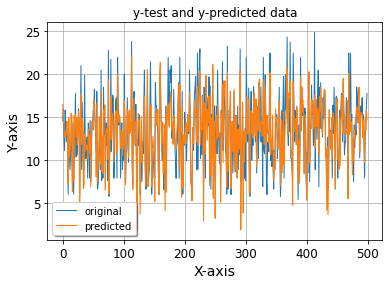

In [65]:
x_ax = range(len(y_test))
x_ax
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, test_pred_lasso, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

## SGDRegressor


In [66]:
sgdr = SGDRegressor()
print(sgdr)

SGDRegressor()


In [67]:
y_train_scale = scale(y_train)
x_train_scale = scale(x_train)

In [68]:
sgdr.fit(x_train_scale, y_train_scale)

score = sgdr.score(x_train_scale, y_train_scale)
print("R-squared:", score)

R-squared: 0.7681513525640035


In [69]:

cv_score = cross_val_score(sgdr, x_train_scale, y_train_scale, cv = 10)
print("CV mean score: ", cv_score.mean())

CV mean score:  0.7533786962917777


In [70]:
x_test_scale = scale(x_test)

In [71]:
ypred_sgd = sgdr.predict(x_test_scale)

In [72]:
y_test_scale = scale(y_test)

In [73]:
mse_sgd = mean_squared_error(y_test_scale, ypred_sgd)

In [74]:
print("MSE: ", mse_sgd)

MSE:  0.2529229771287358


In [75]:
print("RMSE: ", mse_sgd**(0.5))

RMSE:  0.5029144829180562


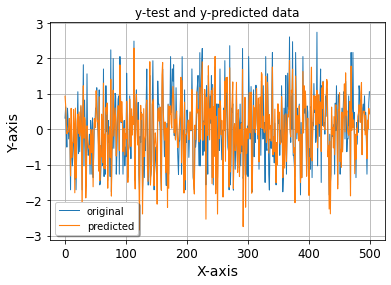

In [76]:
x_ax = range(len(y_test_scale))
x_ax
plt.plot(x_ax, y_test_scale, linewidth=1, label="original")
plt.plot(x_ax, ypred_sgd, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [77]:
ypred_sgd

array([ 0.93,  0.67,  0.17, -0.13, -0.07, -0.09,  0.06,  0.3 , -0.06,
       -1.32,  0.58, -0.81, -0.37, -0.39,  0.55,  0.15, -1.8 ,  0.59,
       -1.38, -0.36,  0.24,  0.42, -0.12,  0.48, -0.2 , -0.08,  0.67,
        0.04, -2.58,  0.41,  1.22, -0.26,  0.32,  0.24, -1.94, -1.46,
        0.09, -0.27, -0.43, -0.53, -0.47, -0.99, -0.01, -0.25, -0.67,
       -0.02, -1.63, -0.32,  0.3 ,  0.14,  0.04,  1.08,  0.56,  0.21,
        0.24, -1.18,  0.91, -1.45, -0.47, -0.79,  0.42,  0.07, -0.95,
        1.3 , -1.1 , -0.14, -1.13,  0.61,  0.43,  0.74, -1.67, -0.18,
       -0.16,  0.06, -0.81,  1.41, -1.89, -0.37,  0.09,  1.1 , -0.2 ,
        0.22,  0.6 ,  0.27, -0.76, -0.02,  0.41,  0.66,  0.56, -0.61,
        1.81,  0.49,  0.21,  0.78,  0.36, -0.63, -0.46,  0.02, -0.73,
       -0.12, -0.27,  0.79,  0.18, -1.5 , -0.59, -0.41,  0.85,  0.32,
       -0.49,  0.57, -0.17,  0.35,  0.13,  2.29, -1.07, -1.69,  0.54,
        0.98,  0.26, -0.45,  0.25, -0.9 , -2.84, -0.11,  0.67,  0.28,
        0.43, -2.39,

In [78]:
y_test_scale

array([ 3.10e-01,  6.28e-01, -4.37e-02, -5.08e-01,  5.90e-01,  2.44e-01,
       -2.77e-01,  8.82e-02, -2.56e-01, -1.71e+00, -4.37e-02, -6.00e-01,
       -1.04e+00, -6.23e-01,  1.29e-02, -5.15e-01, -1.41e+00,  2.44e-01,
       -1.71e+00, -8.33e-01,  4.58e-02,  1.05e+00, -6.91e-01,  3.52e-01,
       -6.37e-01,  8.82e-02,  6.35e-01,  2.44e-01, -1.71e+00, -3.19e-02,
        1.81e+00, -1.04e+00,  8.18e-01, -4.37e-02, -1.04e+00, -1.04e+00,
        1.56e+00, -5.08e-01, -7.39e-01, -6.37e-01, -1.43e-01, -1.27e+00,
        2.44e-01, -4.37e-02, -1.27e+00,  3.19e-01, -1.37e+00, -7.97e-01,
        1.87e-01,  1.64e-01,  5.90e-01,  5.90e-01,  1.17e+00,  2.48e-01,
       -7.43e-02, -5.08e-01,  1.11e+00, -1.57e+00, -1.50e+00, -1.04e+00,
       -2.77e-01, -4.37e-02, -1.04e+00,  1.69e+00, -1.34e+00, -2.77e-01,
       -1.27e+00,  1.22e+00, -7.19e-02,  7.05e-01, -1.45e+00,  2.44e-01,
       -3.73e-01, -3.19e-02, -1.34e+00,  2.23e+00, -1.77e+00, -6.00e-01,
       -5.08e-01,  1.99e+00, -5.43e-01,  1.87e-01, 